In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df = pd.read_csv('../Kaggle/Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df['TotalCharges'] = df['TotalCharges'].replace(" ","0").astype("float64")

converted 0 and 1 values of SeniorCitizen to Yes & No to make it easier to understand.

In [8]:
def conv(value):
    if value == 1:
        return"Yes"
    else:
        return"No"
df['SeniorCitizen'] = df['SeniorCitizen'].apply(conv)

In [9]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,No,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,No,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,No,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,No,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,No,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


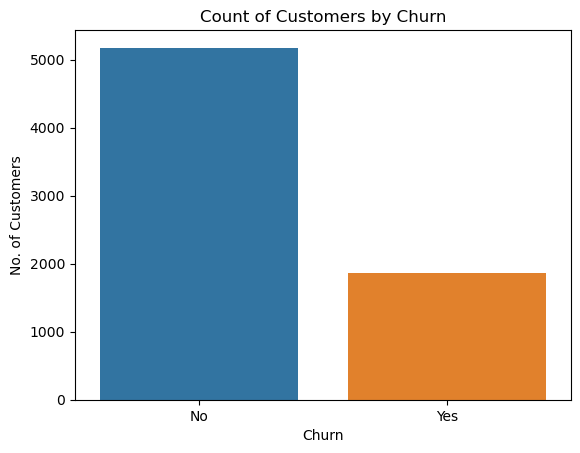

In [10]:
sb.countplot(x=df.Churn , data = df )
plt.title("Count of Customers by Churn")
plt.ylabel("No. of Customers")
plt.show()

1)Most customers (5000+) did not churn and are still using the service.

2)Only around 1900 customers churned, which is much less.

3)This shows the company has a high customer retention rate.

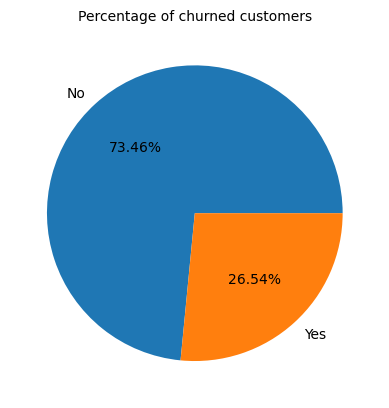

In [11]:
gb = df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'], labels=gb.index, autopct='%1.2f%%')
plt.title("Percentage of churned customers", fontsize = 10)
plt.show()

From the given pie chart we can conclude that 26.54% of our customers have churned out.
now let's explore the reason behind it.

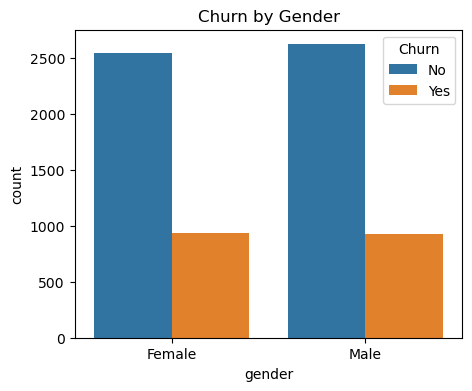

In [12]:
plt.figure(figsize = (5,4))
sb.countplot(x=df.gender, data = df, hue=df.Churn)
plt.title('Churn by Gender')
plt.show()

1)Churn is almost equal for both genders – The number of males and females who left the service is nearly the same.

2)More customers stayed than left – For both genders, the number of non-churned customers is higher than churned ones.

3)Gender does not impact churn much – Male and female customers show similar churn behavior.

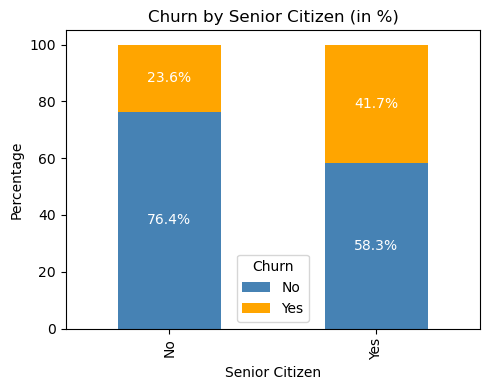

In [13]:
# Step 1: Count values
counts = df.groupby(['SeniorCitizen', 'Churn']).size().unstack()

# Step 2: Convert counts to percentage
percent = counts.div(counts.sum(axis=1), axis=0) * 100

# Step 3: Plot stacked bar chart
percent.plot(kind='bar', stacked=True, figsize=(5,4), color=['steelblue', 'orange'])

plt.title('Churn by Senior Citizen (in %)')
plt.xlabel('Senior Citizen')
plt.ylabel('Percentage')
plt.legend(title='Churn')

# Step 4: Add percentage labels on bars
for i in range(len(percent)):
    bottom = 0
    for j in range(len(percent.columns)):
        value = percent.iloc[i, j]
        plt.text(i, bottom + value/2, f'{value:.1f}%', ha='center', va='center', color='white')
        bottom += value

plt.tight_layout()
plt.show()


1)Senior citizens have a higher churn rate – 41.7% of senior citizens have left the service.

2)Non-senior citizens churn less – Only 23.6% of non-senior citizens have churned.

3)Company should focus on senior citizens – They are more likely to leave, so better support or offers might help retain them.

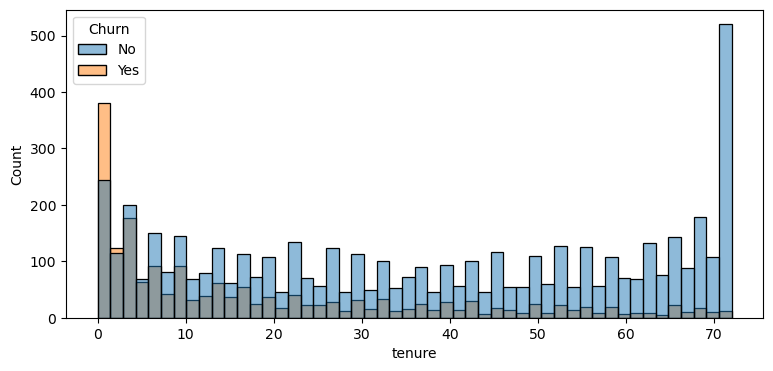

In [14]:
plt.figure(figsize = (9,4))
sb.histplot(x=df.tenure, bins=50, hue=df.Churn)
plt.show()


1)Customers with 0–5 months of tenure have the highest churn
Many new customers leave the service within the first few months, indicating weak early engagement.

2)Churn decreases as the customer's tenure increases
The longer a customer stays, the less likely they are to leave the service.

3)Most loyal customers have a tenure of around 72 months
Customers with 6 years of service show the highest loyalty and lowest churn.

4)Early-stage customers are more likely to leave the service
New users are at higher risk of leaving, so early support is crucial.

5)Mid-tenure (10–60 months) customers show consistent but lower churn
These customers churn at a steady but lower rate, showing moderate loyalty.

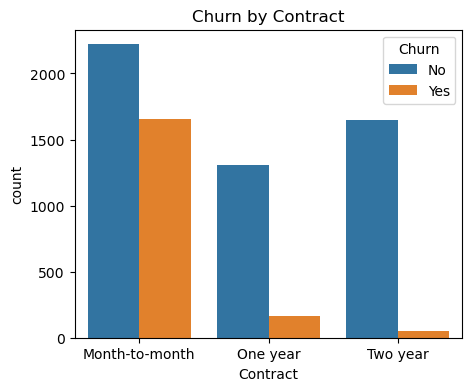

In [15]:
plt.figure(figsize = (5,4))
sb.countplot(x=df.Contract, data = df, hue=df.Churn)
plt.title('Churn by Contract')
plt.show()

Month-to-month contracts have the highest churn — most customers who left were on this plan.

1)One-year and two-year contracts have significantly lower churn — indicating better customer retention.

2)Two-year contracts have the lowest churn rate — almost all customers on this plan stayed.

3)Most customers are on month-to-month contracts — it’s the most common contract type.

4)Longer-term contracts (1 or 2 years) help reduce churn — promoting these may improve loyalty.

5)Flexible plans attract more customers but are riskier in terms of churn.

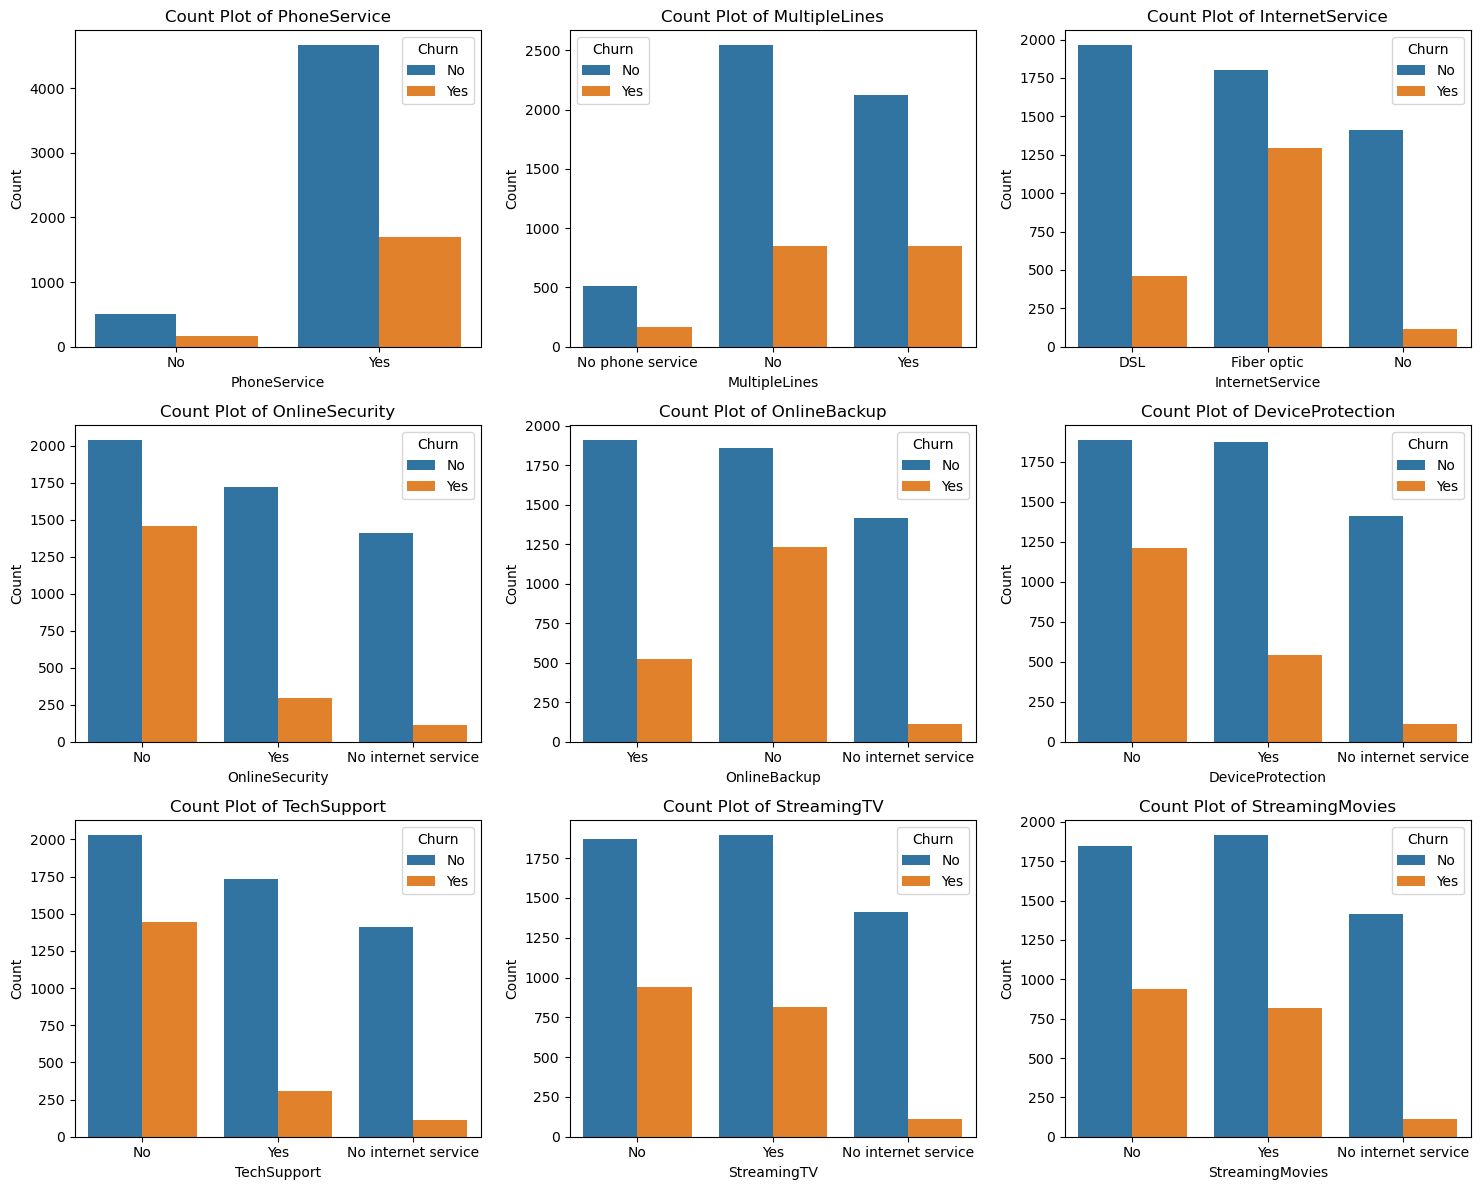

In [16]:
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4)) 

axes = axes.flatten()

for i, col in enumerate(columns):
    sb.countplot(x=col, data=df, ax=axes[i], hue = df["Churn"])
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()a
plt.show()

📞Phone Service & Multiple Lines
🔸 Most customers have phone service, and among them, churn is higher simply due to volume.

🔸 Customers with multiple lines churn slightly more than those without.

🌐 Internet Service
🔸 Fiber optic users show the highest churn compared to DSL and no internet service.

🔸 Customers without internet service churn the least.

🔐 Online Security, Backup & Device Protection
🔸 Churn is higher among customers who do not use online security.

🔸 Online backup reduces churn — customers with it stay longer.

🔸 Device protection users show lower churn than those without it.

🛠️ Tech Support
🔸 Customers without tech support churn significantly more.

🔸 Tech support presence improves customer retention.

📺 Streaming TV & Movies
🔸 Churn is higher among customers who do not use streaming services.

🔸 Streaming TV and Movies are linked with better retention.

🧠 Overall Insights
🔹 Customers using more services (security, support, streaming) are less likely to churn.

🔹 Lack of value-added services increases churn risk.

🔹 Fiber optic plans may need review due to their high churn rate.

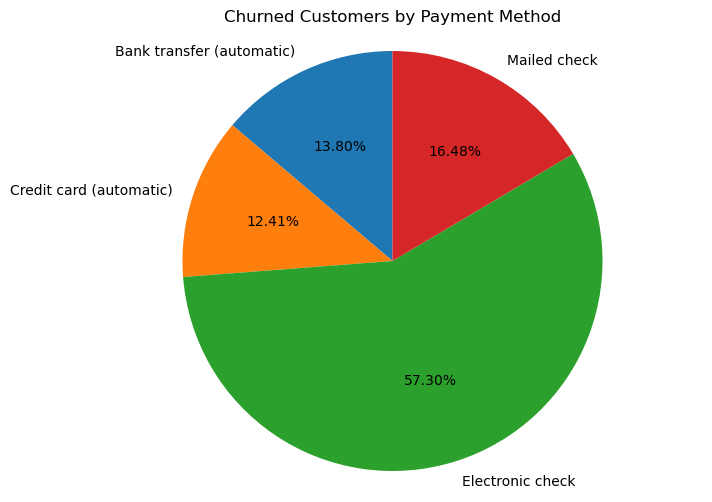

In [17]:
churn_payment = df.groupby(['Churn', 'PaymentMethod']).size().reset_index(name='Count')

churned = churn_payment[churn_payment['Churn'] == 'Yes']

plt.figure(figsize=(8, 6))
plt.pie(churned['Count'], labels=churned['PaymentMethod'], autopct='%1.2f%%', startangle=90)
plt.title('Churned Customers by Payment Method', fontsize=12)
plt.axis('equal')
plt.show()


1)Electronic check is the most common payment method among churned customers (57.30%).
→ This suggests customers using electronic checks are more likely to churn.

2)Mailed checks are the second highest churn contributor (16.48%).
→ Manual payment methods might be linked with lower satisfaction or inconsistency.

3)Bank transfer (automatic) has a relatively lower churn rate (13.80%).
→ Automatic payments might help retain customers by offering convenience.

4)Credit card (automatic) users show the lowest churn (12.41%).
→ These users are likely to be more stable and retained.

